In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import modules

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2024-02-27 13:05:36.203789: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 13:05:36.203890: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 13:05:36.371558: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
sample_image = tf.keras.preprocessing.image.load_img('/kaggle/input/animals/animals/train/cat/cat1.jpg', target_size= (224, 224))

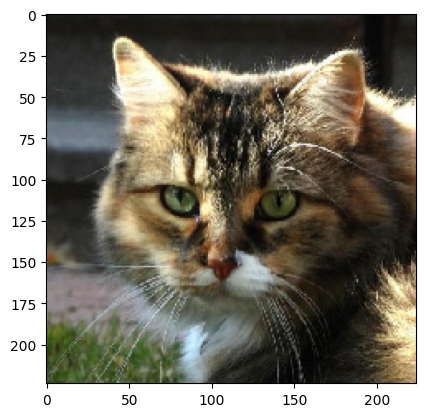

In [4]:
plt.imshow(sample_image)

## Create Train and Validation Generator datas

In [5]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [6]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [7]:
train_generator = train_datagen.flow_from_directory("/kaggle/input/animals/animals/train",
                                                   target_size = (224 , 224),
                                                   color_mode = 'rgb',
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

Found 13474 images belonging to 5 classes.


In [8]:
val_generator = val_datagen.flow_from_directory("/kaggle/input/animals/animals/val",
                                                   target_size = (224 , 224),
                                                   color_mode = 'rgb',
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

Found 1497 images belonging to 5 classes.


# Create a model

In [9]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)

94765736/94765736 [==============================] - 0s 0us/step


In [10]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [11]:
x = base_model.output

In [12]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [13]:
x = tf.keras.layers.Dense(1024, activation= 'relu')(x)
x = tf.keras.layers.Dense(1024, activation= 'relu')(x)
x = tf.keras.layers.Dense(1024, activation= 'relu')(x)
x = tf.keras.layers.Dense(512, activation= 'relu')(x)
preds = tf.keras.layers.Dense(5, activation= 'softmax')(x)

In [14]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = preds)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

# freezing layers

In [16]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [17]:
for layer in model.layers[:175]:
    layer.treinable = False

In [18]:
for layer in model.layers[175:]:
    layer.treinable = True

# Compile and Train model

In [20]:
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(train_generator, epochs=25)

Epoch 1/20


I0000 00:00:1709039205.854180     130 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


211/211 [==============================] - 196s 712ms/step - loss: 0.4948 - accuracy: 0.8281
Epoch 2/20
211/211 [==============================] - 146s 692ms/step - loss: 0.2630 - accuracy: 0.9069
Epoch 3/20
211/211 [==============================] - 146s 690ms/step - loss: 0.2082 - accuracy: 0.9286
Epoch 4/20
211/211 [==============================] - 146s 690ms/step - loss: 0.1733 - accuracy: 0.9405
Epoch 5/20
211/211 [==============================] - 146s 691ms/step - loss: 0.1320 - accuracy: 0.9532
Epoch 6/20
211/211 [==============================] - 146s 689ms/step - loss: 0.1337 - accuracy: 0.9548
Epoch 7/20
211/211 [==============================] - 146s 692ms/step - loss: 0.1008 - accuracy: 0.9662
Epoch 8/20
211/211 [==============================] - 146s 691ms/step - loss: 0.1207 - accuracy: 0.9640
Epoch 9/20
211/211 [==============================] - 146s 689ms/step - loss: 0.1138 - accuracy: 0.9636
Epoch 10/20
211/211 [==============================] - 146s 691ms/step - lo

# Historical loss and accuracy

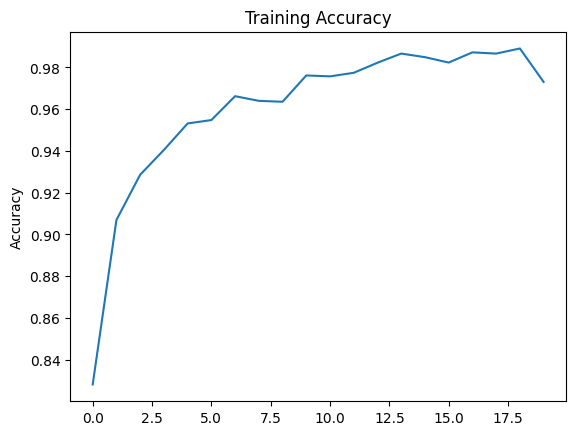

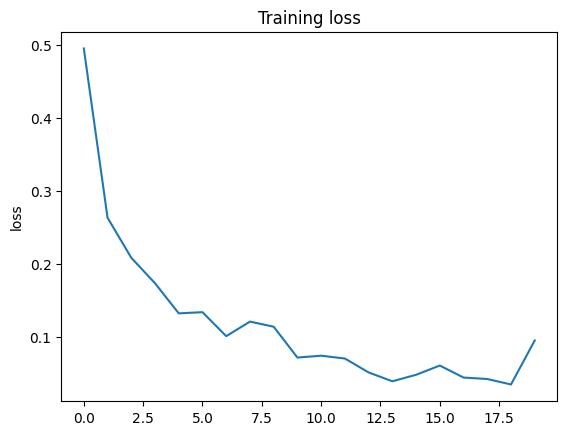

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label = 'Training loss')
plt.ylabel('loss')
plt.title('Training loss')
plt.show()

# Tests on validation data

## Test on single sample image

In [23]:
sample_image2 = tf.keras.preprocessing.image.load_img('/kaggle/input/animals/animals/val/horse/horse1.png', target_size = (224, 224))

In [24]:
classes = val_generator.class_indices

In [25]:
classes

{'cat': 0, 'dog': 1, 'elephant': 2, 'horse': 3, 'lion': 4}

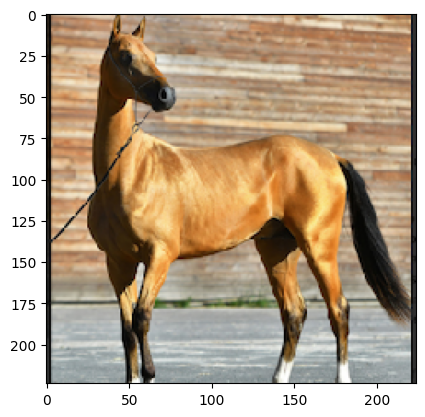

In [26]:
plt.imshow(sample_image2)

In [27]:
sample_image2 = tf.keras.preprocessing.image.img_to_array(sample_image2)

In [28]:
sample_image2 = np.expand_dims(sample_image2, axis = 0)

In [29]:
sample_image2 = tf.keras.applications.resnet50.preprocess_input(sample_image2)

In [30]:
predictions = model.predict(sample_image2).argmax()
print(predictions)

1/1 [==============================] - 2s 2s/step
3


In [31]:
class_name = list({k for k in classes if classes[k]==predictions})[0]

In [32]:
class_name

'horse'

## Test validation data

In [33]:
predictions = model.predict(val_generator).argmax(axis=1)

24/24 [==============================] - 17s 664ms/step


In [34]:
predictions.shape

(1497,)

In [35]:
predictions

array([0, 4, 3, ..., 4, 0, 0])

In [36]:
y_true = val_generator.classes

In [37]:
predicted_names = []
for prediction in predictions:
    predicted_names.append({k for k in classes if classes[k]==predictions[prediction]})

In [39]:
import plotly.express as px

fig = px.density_heatmap(x=predictions, y=y_true, text_auto=True).update_layout(
    xaxis_title="Predicted Values", yaxis_title="Real values")
fig.show()

In [ ]:
# predicted_names

In [40]:
model.save_weights("weights_animals_resnet.h5")